In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [126]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [127]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [128]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

## Supervised Learning (Linear Regression)

<i>Encoding pada kolom bertipe kategorikal</i>

In [129]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
for cols in columns:
    df[cols] = encoder.fit_transform(df[cols])

<i>Membagi data variabel x dan y ke dalam train set dan test set</i>

In [130]:
x = df.drop("price", axis=1) # semua fitur kecuali kolom price
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<i>Membuat model regresi linear</i>

In [131]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# melatih model dengan variabel x dan y dari train set
reg.fit(x_train, y_train)

LinearRegression()

<i>Melakukan prediksi pada data yang diuji</i>

In [132]:
y_pred = reg.predict(x_test)

**Hasil Prediksi**

<i>Hasil prediksi menunjukkan
1. Mean Absolute Error menunjukkan perbedaan antara nilai prediksi dan nilai aktual sebesar 716583.4. Semakin rendah maka semakin baik nilai model.
2. Mean Squared Error menunjukkan rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual sebesar 986041803890.03. Nilai ini menunjukkan ada variasi yang signifikan antara prediksi model dan nilai aktual.
3. Root Mean Squared Error merupakan akar kuadrat dari MSE sebesar 992996.38. Nilai ini menunjukkan bahwa model memiliki kesalahan rata-rata sesuai nilai tsb.
4. R-Squared mengukur seberapa baik model sesuai dengan data. Semakin mendekati 1, maka semakin baik. Disini nilai R-Squared adalah 0.66 yang artinya cukup baik.</i>

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 716583.439661547
MSE : 986041803890.027
RMSE : 992996.3765744702
R-Squared : 0.6578047592637595


**Plot Hasil Prediksi**

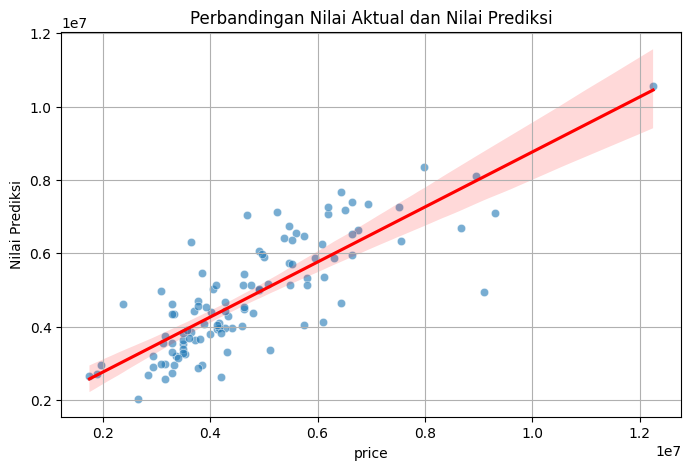

In [183]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual dan Nilai Prediksi')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.grid(True)
plt.show()

<i>menggunakan heatmap</i>

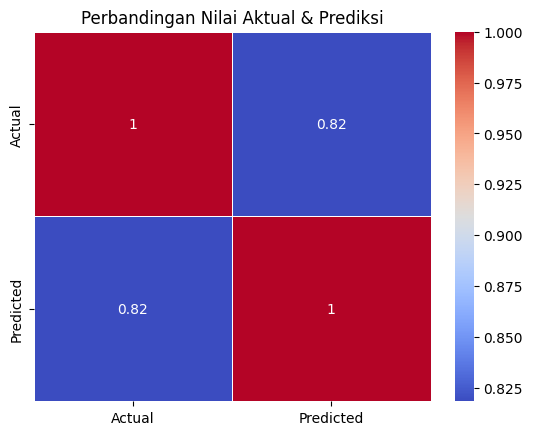

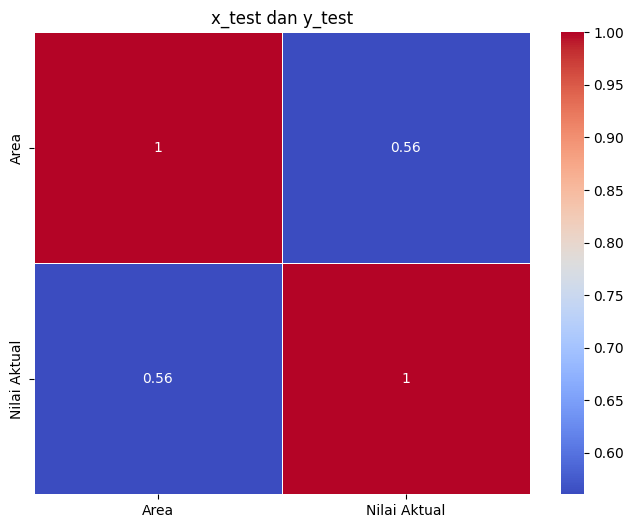

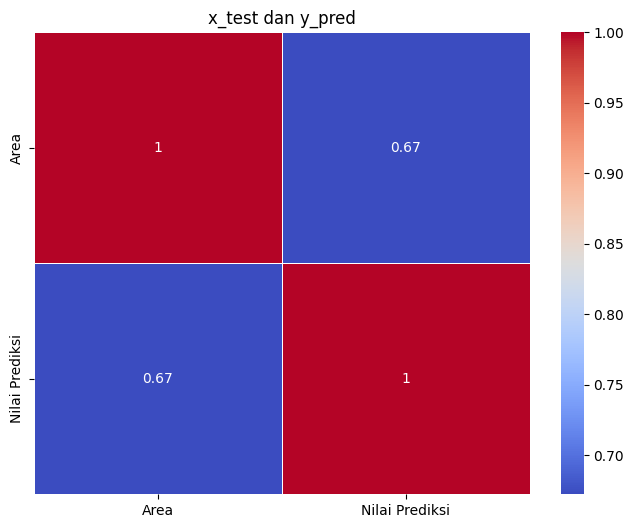

In [184]:
# perbandingan nilai aktual dan prediksi
c = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.heatmap(c.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("Perbandingan Nilai Aktual & Prediksi")
plt.show()

# house price berdasarkan fitur area (nilai aktual)
c1 = pd.DataFrame({'Area': x_test["area"], 'Nilai Aktual': y_test})
plt.figure(figsize=(8, 6))
sns.heatmap(c1.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("x_test dan y_test")
plt.show()

# house price berdasarkan fitur area (nilai prediksi)
c2 = pd.DataFrame({'Area': x_test["area"], 'Nilai Prediksi': y_pred})
plt.figure(figsize=(8, 6))
sns.heatmap(c2.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("x_test dan y_pred")
plt.show()


## Unsupervised Learning (K-Means)

**Melakukan Klasterisasi**

In [135]:
from sklearn.cluster import KMeans
X = df.iloc[:, [0, 1]].values # fitur price dan area
K = 2 # yes/no, 0/1

kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X) # melatih model berdasarkan fitur
cluster_labels = kmeans.labels_ # label kelompok dari model
df["cluster"] = cluster_labels # kolom prediksi
centroids = kmeans.cluster_centers_ # titik pusat

**Visualisasi**
<i>
1. Centroid adalah pusat dari masing kluster. Memberi gambaran di mana titik dalam kluster berpusat.
2. Titik data yang berada dalam satu kluster mempunyai warna yang sama. 
3. Kluster dibagi berdasarkan kesamaan fitur "price" dan "area". </i>

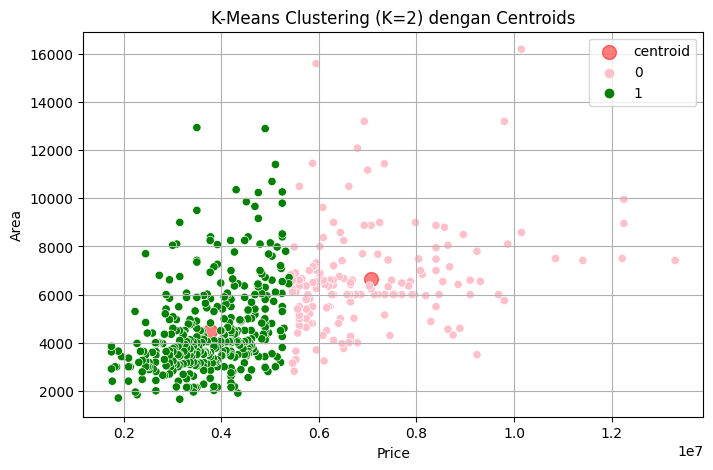

In [136]:
# nilai prediksi
color = ["pink", "green"]
plt.figure(figsize=(8, 5))
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='centroid')
sns.scatterplot(data=df, x="price", y="area", hue="cluster", palette=color)
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Price")
plt.ylabel("Area")
plt.legend()
plt.grid(True)
plt.show()


**Hasil Prediksi**

**Tanpa label asli**
<i>
1. Silhouette Score mengukur seberapa baik cluster terpisah dengan jarak antara  nilai -1 sampai 1. Nilai 0.62 menunjukkan hasil clustering cukup baik.
2. Davies-Bouldin Index mengukur seberapa baik cluster yang dihasilkan terpisah satu sama lain dan seberapa sama jarak pisah tiap clusternya. Nilai 0.58 menunjukkan cluster terpisah dengan cukup baik.
3. Calinski-Harabasz Index sama seperti DB Index namun menghitung kepadatan tiap clusternya. Nilai 1006.03 menunjukkan sangat baik kepadatan clusternya. </i>

In [137]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.62
Davies-Bouldin Index: 0.58
Calinski-Harabasz Index: 1006.03


**Dengan label asli**
<i>
1. Cross Tabulation menganalisis hubungan antara hasil clustering dengan label asli. Pada prefarea 0 dan cluster 0 terdapat 93.
2. ARI mengukur apakah hasil clustering cocok dengan label asli. Nilai 0.16 menunjukkan adanya beberapa kesamaan antara cluster dengan label asli.
3. NMI mengukur hubungan atau kesamaan antara dua himpunan partisi data/ Nilai 0.08 menunjukkan kesesuaian tidak sempurna dan berbeda dengan label asli.
4. HVC-M mengukur kualitas data dari hasil clustering. Nilai 0.08 dari Homogeneity Score menunjukkan semua data dalam cluster berasal dari semua kelas. Nilai 0.07 dari Completeness Score menunjukkan semua data dari satu kelas terbagi ke dalam beberapa cluster. Nilai 0.08 dari V-Measure Score menunjukkan bahwa hasil clustering tidak sempurna.</i>

In [138]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
cross_tab = pd.crosstab(df["cluster"], df["prefarea"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["prefarea"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
true_labels_num = df["prefarea"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
homogeneity = homogeneity_score(df["prefarea"], cluster_labels)
completeness = completeness_score(df["prefarea"], cluster_labels)
v_measure = v_measure_score(df["prefarea"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
prefarea    0   1
cluster          
0          93  71
1         324  57 

Adjusted Rand Index (ARI): 0.16
Normalized Mutual Information (NMI): 0.08
Homogeneity Score: 0.08
Completeness Score: 0.07
V-Measure Score: 0.08
